In [1]:
%load_ext autoreload
%autoreload 1
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

from logging.config import dictConfig
from logging import getLogger

dictConfig(dict(
    version = 1,
    formatters = {'f': {'format': '%(asctime)s %(name)-12s %(levelname)-8s %(message)s'}},
    handlers = {
        'h': {'class': 'logging.StreamHandler','formatter': 'f',
              'level': logging.DEBUG}},
    root = {'handlers': ['h'], 'level': logging.DEBUG,},
))

matplotlib.rc({
    'font': {
        'size':16, 'family':'sans-serif','sans-serif':['HelveticaNeue', 'Helvetica']}
    ,
    'usetex': True
})

logger = getLogger('notebook')


In [3]:
import yt_misc_py as yt_misc

import rivas_decomposition_py as decomposition


In [4]:
repo_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath(os.getcwd()))))

out_dir = os.path.join(
    repo_dir, 'figs', os.path.basename(os.path.realpath(os.getcwd())),
)


In [5]:
# d_PTVs = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))

# d_coding = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_codingNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))

d_all = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_allNonMHC_z_center_p0001_100PCs_20180129.npz'
))


2018-10-03 02:43:10,709 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_allNonMHC_z_center_p0001_100PCs_20180129.npz


In [6]:
var_gene_labels_df = pd.read_table(
    os.path.join(repo_dir, 'private_data', 'variant_and_gene_labels.tsv.gz'),
    compression='gzip'
)

gene_dict = dict(zip(
    var_gene_labels_df['Gene'], 
    var_gene_labels_df['label_gene']
))


In [7]:
phe_gs = decomposition.Phe_label_groups(d_all.d['label_phe'])
phe_gs.add('fat-free')
phe_gs.add('fat', 'fat\s')
phe_gs.add('impedance')
phe_gs.add('reticulocyte')
phe_gs.add('meridian')
phe_gs.add('spirometry', r'fvc|fev1|pef')


In [8]:
print(phe_gs)

fat-free
  Arm fat-free mass (left)
  Arm fat-free mass (right)
  Leg fat-free mass (left)
  Leg fat-free mass (right)
  Total fat-free mass
  Trunk fat-free mass
  Whole body fat-free mass

fat
  Android fat mass
  Android tissue fat percentage
  Arm fat mass (left)
  Arm fat mass (right)
  Arm fat percentage (left)
  Arm fat percentage (right)
  Arm tissue fat percentage (left)
  Arm tissue fat percentage (right)
  Arms fat mass
  Arms tissue fat percentage
  Body fat percentage
  Gynoid fat mass
  Gynoid tissue fat percentage
  Leg fat mass (left)
  Leg fat mass (right)
  Leg fat percentage (left)
  Leg fat percentage (right)
  Leg tissue fat percentage (left)
  Leg tissue fat percentage (right)
  Legs fat mass
  Legs tissue fat percentage
  Total fat mass
  Total tissue fat percentage
  Trunk fat mass
  Trunk fat percentage
  Trunk tissue fat percentage
  Whole body fat mass

impedance
  Impedance of arm (left)
  Impedance of arm (right)
  Impedance of leg (left)
  Impedance of leg

2018-05-14 11:05:48,987 plot_contribution DEBUG    Arm fat-free mass (L)	Arm fat-free mass (left)
2018-05-14 11:05:48,992 plot_contribution DEBUG    Leg fat-free mass (L)	Leg fat-free mass (left)
2018-05-14 11:05:48,994 plot_contribution DEBUG    Leg fat-free mass (R)	Leg fat-free mass (right)
2018-05-14 11:05:48,996 plot_contribution DEBUG    Arm fat-free mass (R)	Arm fat-free mass (right)
2018-05-14 11:05:48,998 plot_contribution INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/Fig2_RIDGE/legend/fig2_group_fat-free.png
2018-05-14 11:05:49,457 plot_contribution INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/Fig2_RIDGE/legend/fig2_group_fat-free.pdf
2018-05-14 11:05:49,790 plot_contribution DEBUG    Gynoid tissue fat %	Gynoid tissue fat percentage
2018-05-14 11:05:49,792 plot_contribution DEBUG    Arm tissue fat % (R)	Arm tissue fat percentage (right)
2018-05-14 11:05:49,793 plot_contribution DEBUG    Arms tissue fat %	Arms tissue fat percentage


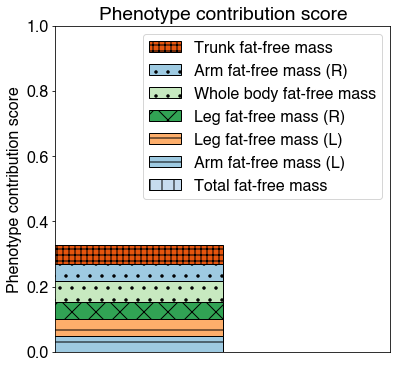

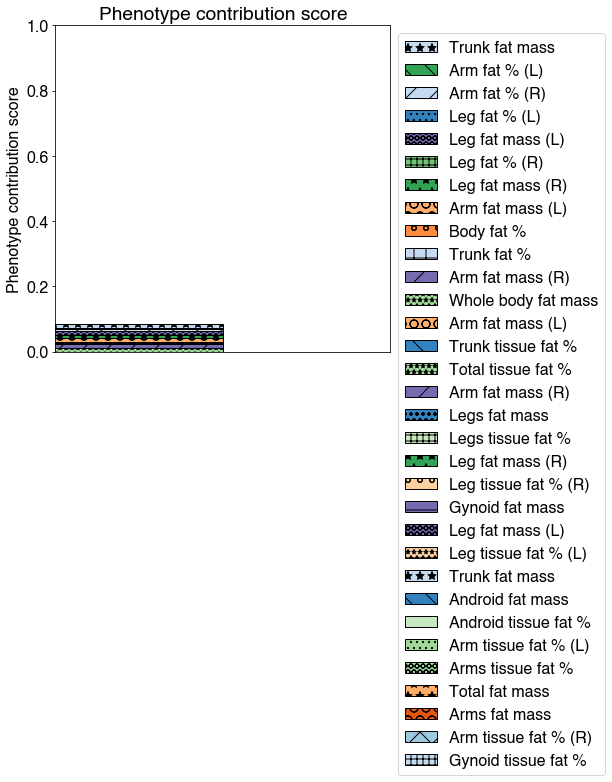

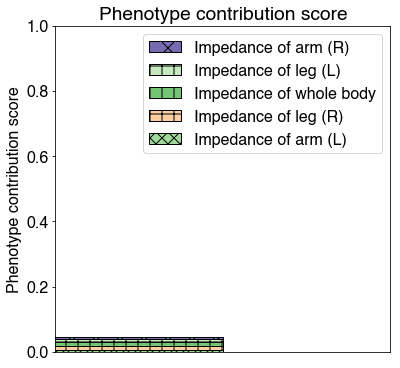

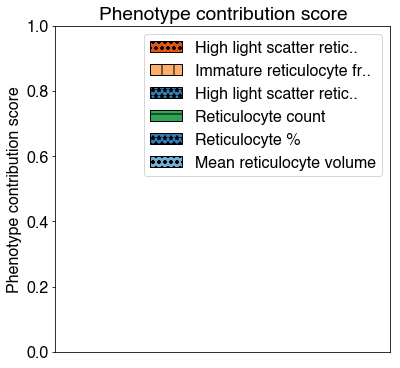

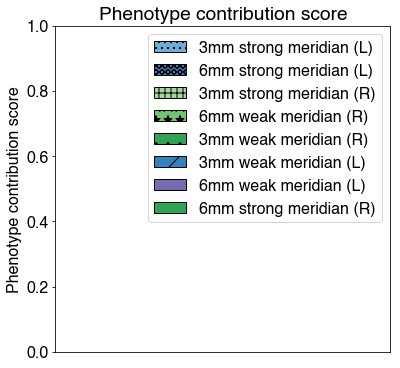

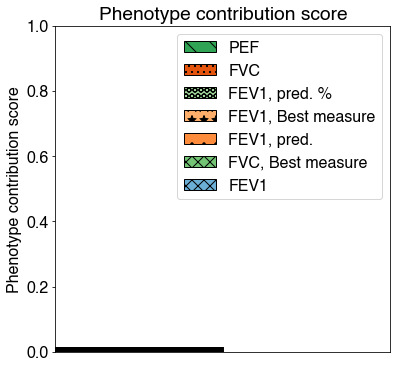

In [9]:
for k, v in phe_gs.dict.items():
    decomposition.plot_contribution_legend_phe(
        d = d_all, pc_index = 0, 
        phe_list=v,        
        save = os.path.join(out_dir, 'legend','fig2_group_{}'.format(k)),
    )


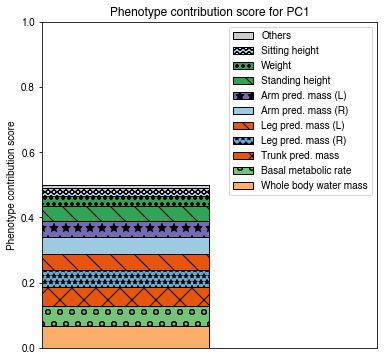

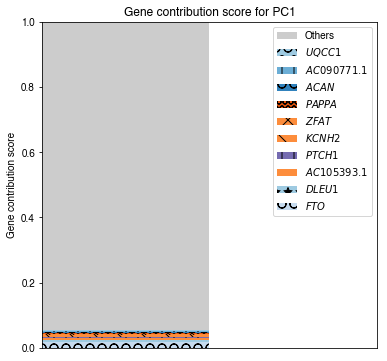

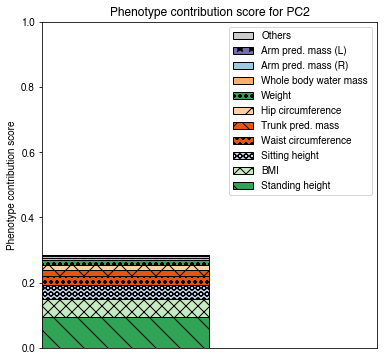

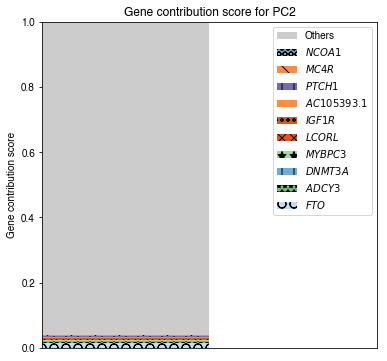

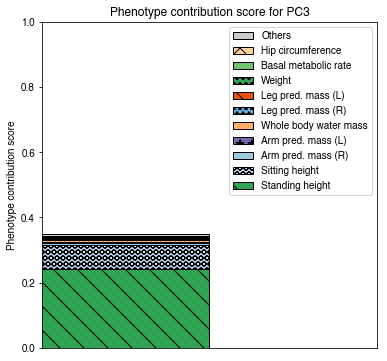

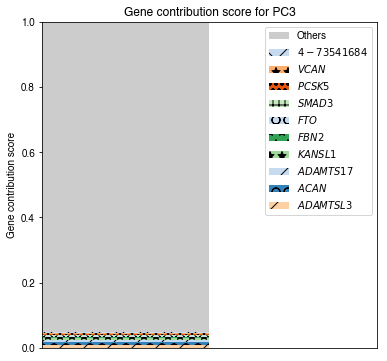

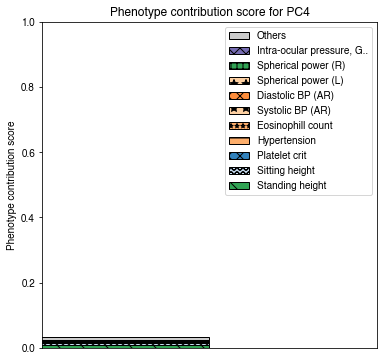

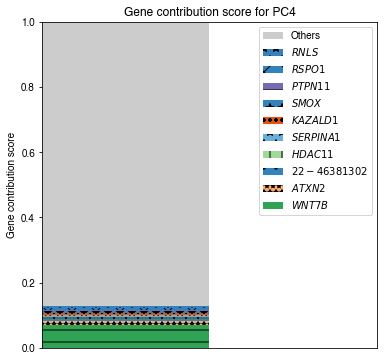

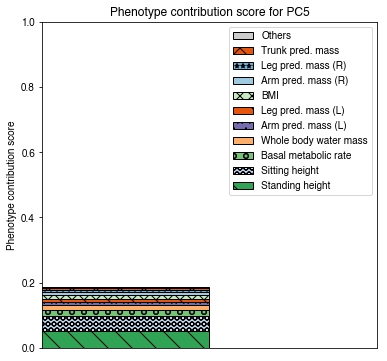

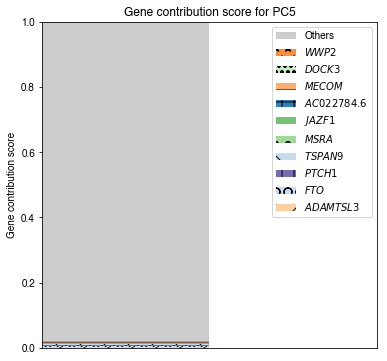

In [9]:
decomposition.plot_contribution_legend_batch_topk_fig(
    gene_dict = gene_dict, 
    out_dir = os.path.join(out_dir, 'legend'), 
    fig_title = 'fig2', 
    d = d_all, 
    topk = 5,
    phe_gs=phe_gs,
)


2018-05-14 11:06:11,258 plot_contribution INFO     fat-free: 0.3270; fat: 0.0624; impedance: 0.0459; spirometry: 0.0051
2018-05-14 11:06:11,361 plot_contribution INFO     fat: 0.6150; spirometry: 0.0464; fat-free: 0.0251
2018-05-14 11:06:11,448 plot_contribution INFO     impedance: 0.3868; fat: 0.1356; spirometry: 0.0945
2018-05-14 11:06:11,545 plot_contribution INFO     meridian: 0.8088; reticulocyte: 0.1528
2018-05-14 11:06:11,607 plot_contribution INFO     impedance: 0.4541; spirometry: 0.2598; fat-free: 0.0583


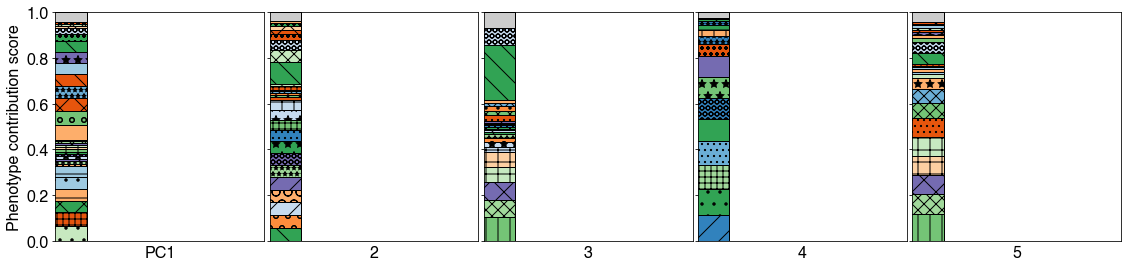

In [10]:
decomposition.contribution_score_plot(
    d_all, 'phe', pc_list=range(5), bar_width=0.15,
    figsize=(16, 4),
    contribution_thr=0.005,
    save=os.path.join(out_dir, 'fig-allNonMHC-phe-top5-groups'),
    phe_gs=phe_gs
)


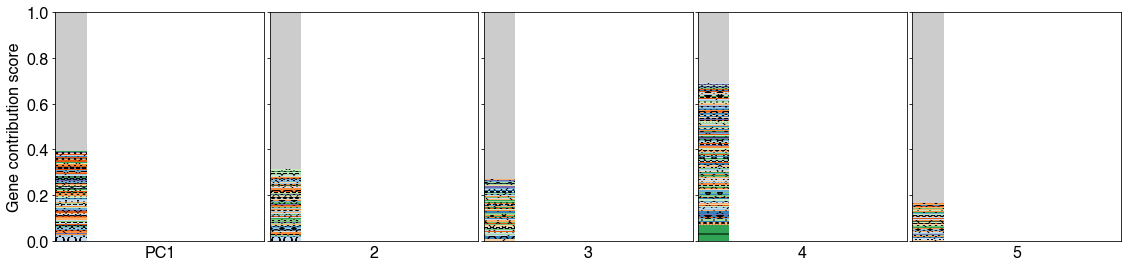

In [11]:
decomposition.contribution_score_plot(
    d_all, 'gene', pc_list=range(5), bar_width=0.15,
    figsize=(16, 4),
    contribution_thr=0.0005,
    save=os.path.join(out_dir, 'fig-allNonMHC-gene-top5')
)
